In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)

In [19]:
ramyun = cv2.imread('ramyun.jpg') 
instant_noodles = cv2.imread('instant_noodles.jpg') 

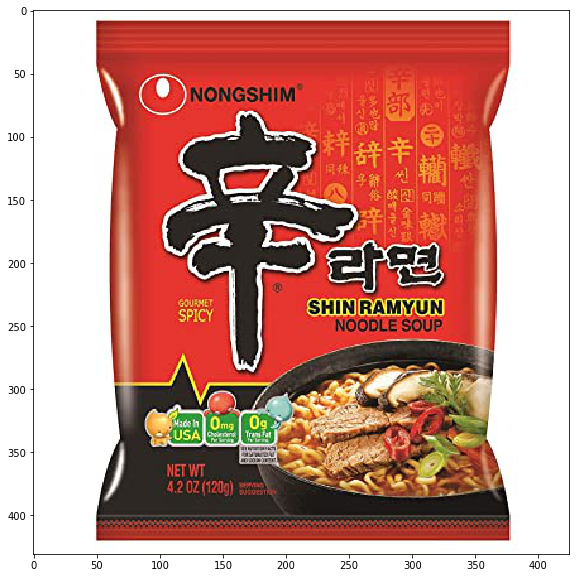

In [21]:
display(ramyun)

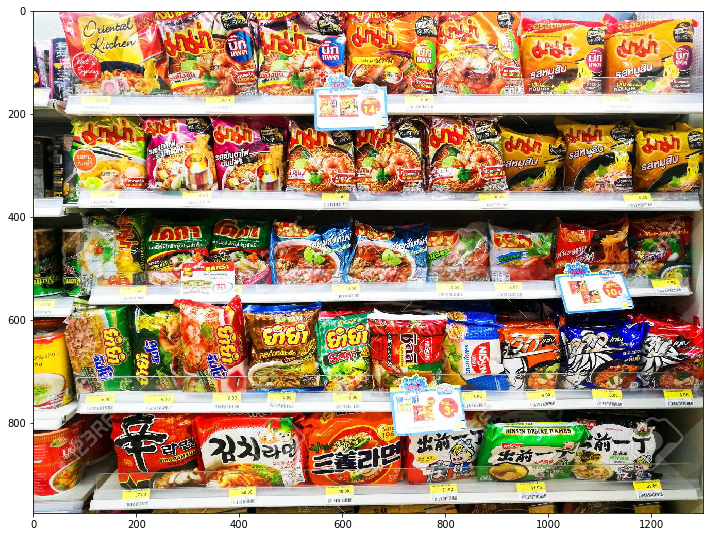

In [22]:
display(instant_noodles)

In [28]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(ramyun,None)
kp2, des2 = sift.detectAndCompute(instant_noodles,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0] 
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(ramyun,kp1,instant_noodles,kp2,matches,None,**draw_params)

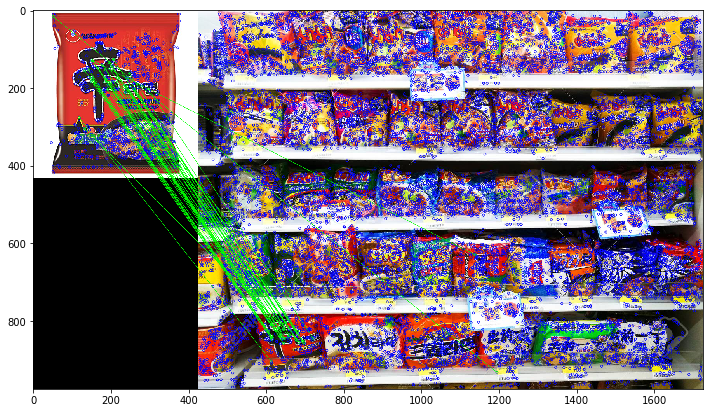

In [27]:
display(flann_matches)